In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import altair as alt
import pandas as pd

In [221]:
ds = pd.read_csv('S1SubActivities_preprocessed.csv', index_col = None) 
ds.start = pd.to_datetime(ds.start, format='%Y-%m-%d %H:%M:%S')
ds.end = pd.to_datetime(ds.end, format='%Y-%m-%d %H:%M:%S')
ds = ds.sort_values('start')
ds.reset_index(drop = True, inplace = True)

In [215]:
ds.head(n=2)

subActNum                subAct               start                 end
0         67      bathroom_cabinet 2003-03-27 06:43:40 2003-03-27 06:43:43
1        100  bathroom_toiletflush 2003-03-27 06:44:06 2003-03-27 07:12:41

In [15]:
ds.info()             # Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 4 columns):
subActNum    2772 non-null int64
subAct       2772 non-null object
start        2772 non-null datetime64[ns]
end          2772 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 86.8+ KB


In [222]:
%run add_DAY_WDWE_phaseI.py

In [223]:
ds = add_DAY_WDWE_phaseI(ds)

In [224]:
ds.head(n=2)

subActNum                subAct               start                 end  \
0         67      bathroom_cabinet 2003-03-27 06:43:40 2003-03-27 06:43:43   
1        100  bathroom_toiletflush 2003-03-27 06:44:06 2003-03-27 07:12:41   

  dayNumeric  DAY WDWE  HOUR  durationSec  
0          3  Thu   WD     6            3  
1          3  Thu   WD     6         1715

1. Set specified column as index
2. Extract dayofweek from index (ds.index.dayofweek.astype(str)), as this as an attribute
3. Replace '0' with 'mon' and so on
4. Duplic

In [24]:
# Unique subActNum list
unique_list = []
for x in ds.subActNum:                  # Traverse for all elements 
    if x not in unique_list:            # Check if exists in unique_list or not 
        unique_list.append(x)     

In [82]:
charts = []
for subActNum in unique_list:
    dsCheck = ds[ds['subActNum'] == subActNum]
    
    color = alt.condition(alt.datum.day > 4,
                      alt.value('orange'),
                      alt.value('grey'))
    
    df = pd.DataFrame({ 
        'start': dsCheck.start, 
        'end': dsCheck.end,
        'day': dsCheck.dayNumeric})
    
    subAct = ds[ds.subActNum == subActNum].subAct.head(1).item()     # Correct 'item' error

    chart = alt.Chart(df.reset_index(), title = "Sub-activity: " + subAct +
                      " // " + "Sub-activity number: " + str(subActNum)).mark_bar().encode(
        y = 'date(start):O',
        x = 'hoursminutes(start)',
        x2 = 'hoursminutes(end)',
        color = color,
        detail = 'index').properties(width=750).interactive()
    
    charts.append(chart)

//anaconda3/envs/IoT_ResearchProject/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning:

`item` has been deprecated and will be removed in a future version



In [86]:
boxPlots = []
for subActNum in unique_list:
    dsCheck = ds[ds['subActNum'] == subActNum]
    
    color = alt.condition(alt.datum.day > 4,
                      alt.value('orange'),
                      alt.value('grey'))
    
    df = pd.DataFrame({ 
        'durationSec': dsCheck.durationSec,
        'subAct' : dsCheck.subAct,
        'day': dsCheck.dayNumeric,
        'WDWE': dsCheck.WDWE})
    
    subAct = ds[ds.subActNum == subActNum].subAct.head(1).item()     # Correct 'item' error

    chart = alt.Chart(df, title = "Sub-activity: " + subAct +
                      " // " + "Sub-activity number: " + str(subActNum)).mark_boxplot().encode(
        x = 'durationSec',
        y = 'subAct',
        row = 'WDWE',
        fill = 'WDWE:N').properties(width=550).interactive()
    
    boxPlots.append(chart)  

//anaconda3/envs/IoT_ResearchProject/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning:

`item` has been deprecated and will be removed in a future version



Intermittant and persistant??? Definitions...

In [10]:
len(charts)

38

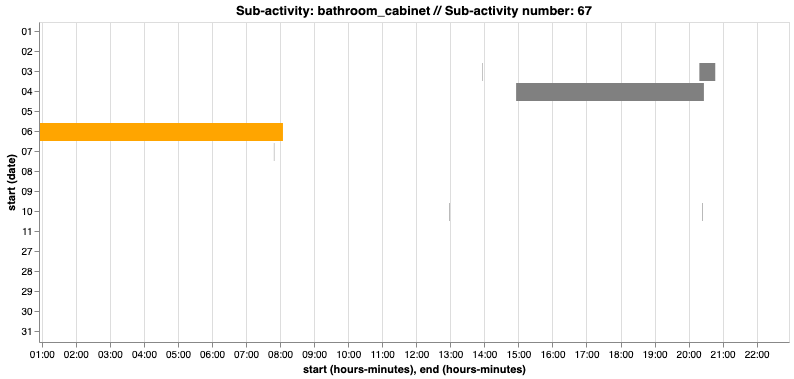

In [83]:
charts[0]

We would expect that bathroom cabinet would display an intermittant/ sporadic interaction profile. On weekend day 6th of April, and on weekday day 4th April, this is not the case. We will therefor cleanse this ds.

---

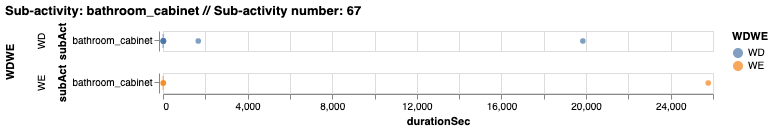

In [87]:
boxPlots[0]

#### Bathroom - Toilet Flush, Sub-activity # 100

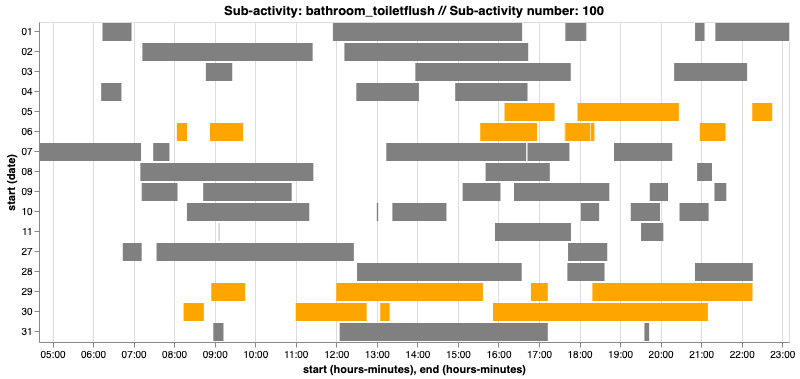

In [55]:
charts[1]

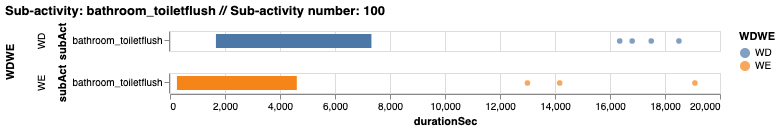

In [88]:
boxPlots[1]

The toiletflush activity was found to have a mean duration of X with a SD of Y. In the ansence of statistical evaluation, the above figure shows that the toiletflush activity occurs in many instances for periods of greater than 1 hour. This is clearly unrealistic and can be rationalised as follows

* The sensor is faulty and remains active for too long after a flush / is to sensitive, thus cause an excess of activity readings
* The sensor remains active while the cistern is filling - if the toilet is very old, whith a cistern that fills over a very long period of time, this could be explained

A toilet flush can be considered to be one discrete activity, therefore these data will be kept, however all end times will be coerced to 1 second after the start time.

---

#### Bathroom - Lightswitch, Sub-activity # 101

* Calc duration
* Plot duration distribution

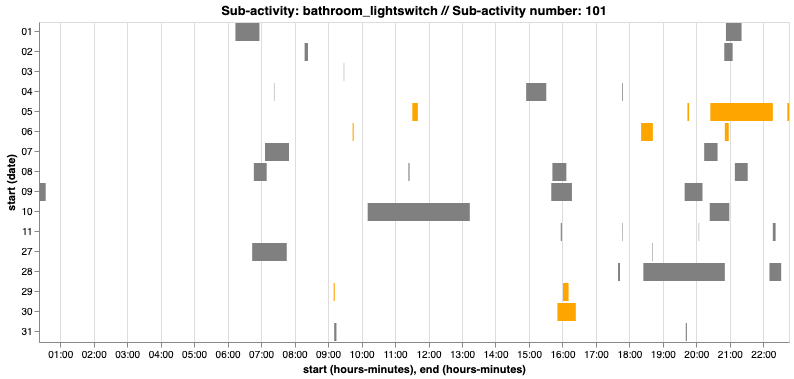

In [56]:
charts[2]

The bathroom lightswitch ... is fine

---

#### Bathroom - Medicine Cabinet, Sub-activity # 57

* Needs to be fixed
* 3 seconds each (check 8th-April @ 07:00 am)

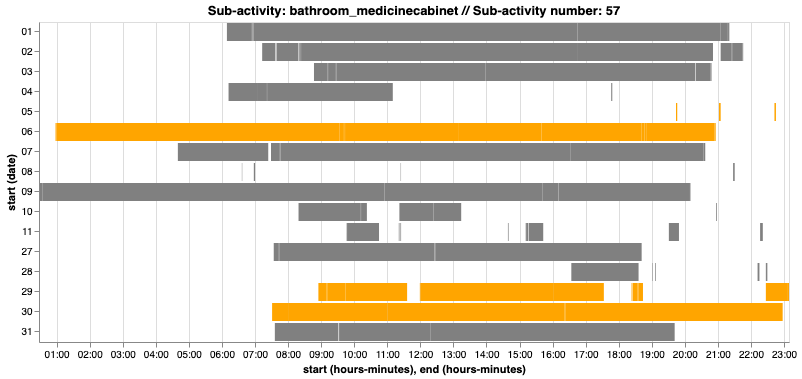

In [57]:
charts[3]

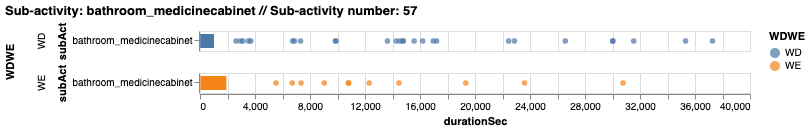

In [89]:
boxPlots[3]

#### Study - Drawer, Sub-activity # 82



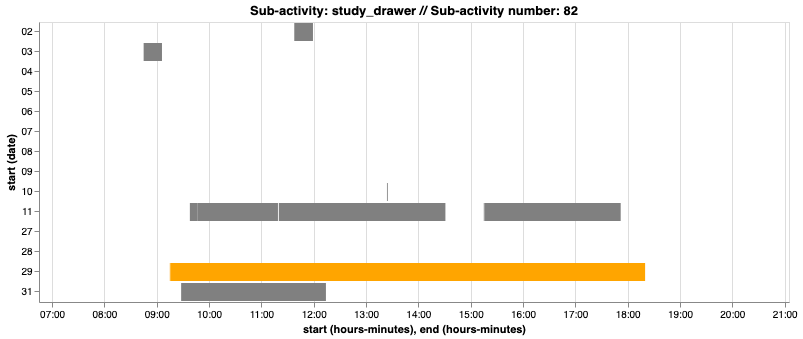

In [94]:
charts[4]

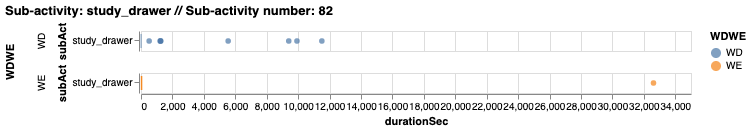

In [90]:
boxPlots[4]

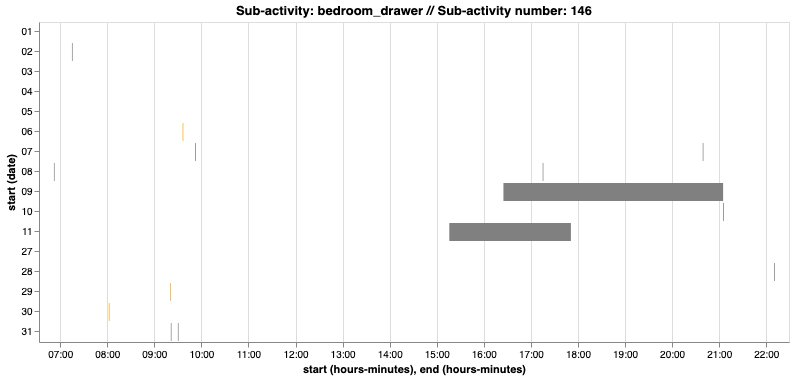

In [59]:
charts[5]

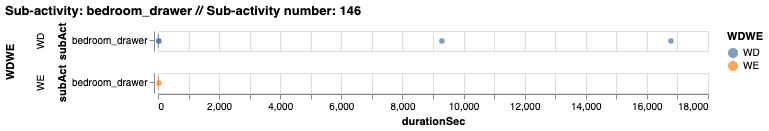

In [91]:
boxPlots[5]

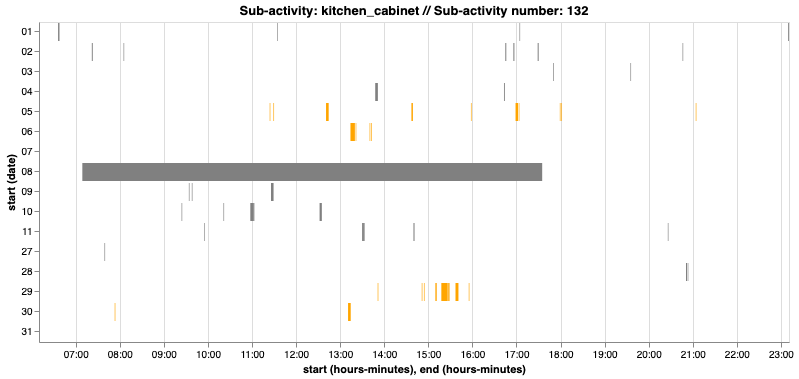

In [95]:
charts[6]

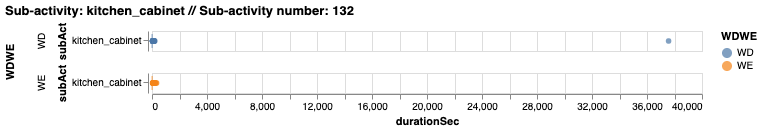

In [92]:
boxPlots[6]

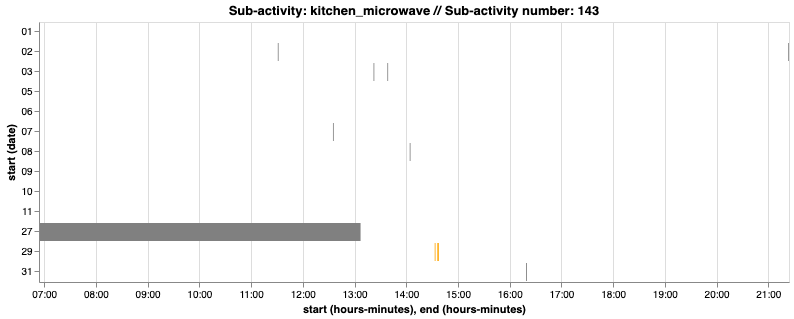

In [96]:
charts[7]

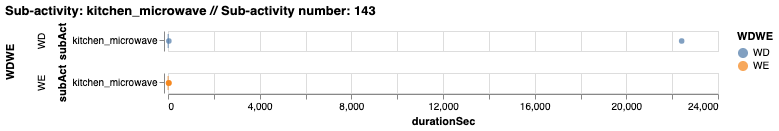

In [93]:
boxPlots[7]

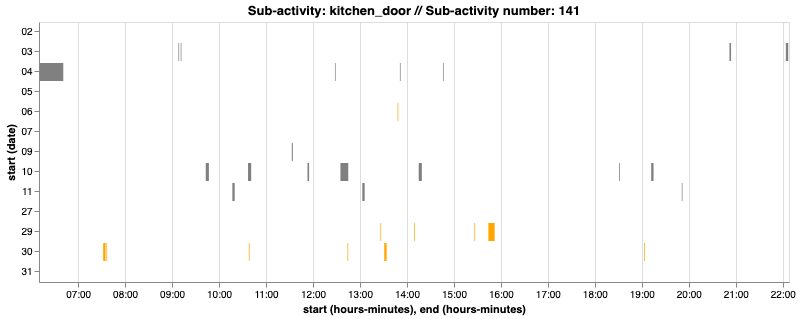

In [62]:
charts[8]

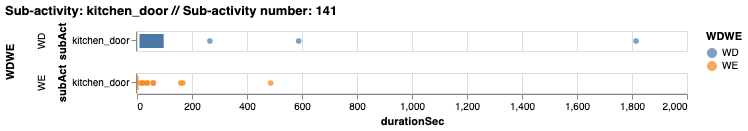

In [94]:
boxPlots[8]

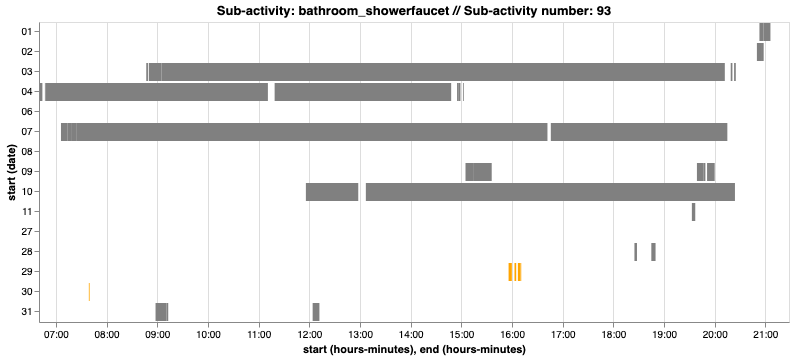

In [63]:
charts[9]

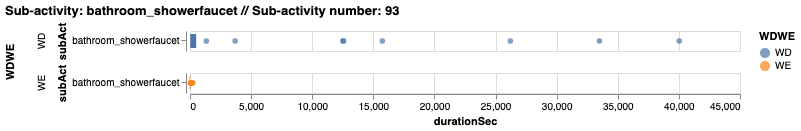

In [95]:
boxPlots[9]

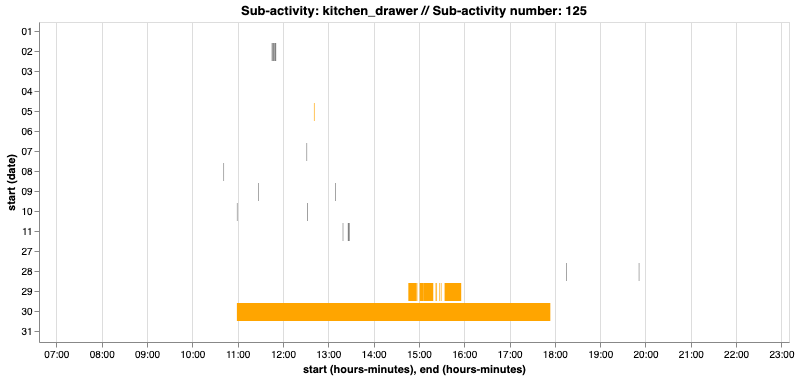

In [64]:
charts[10]

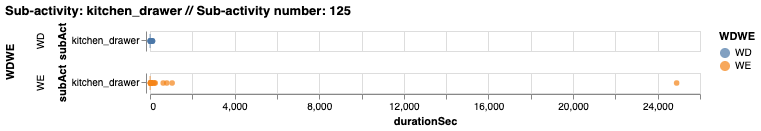

In [96]:
boxPlots[10]

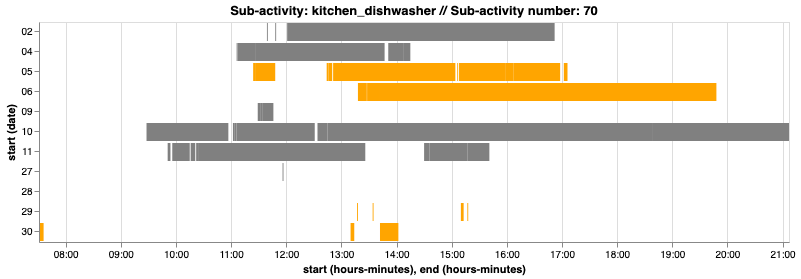

In [65]:
charts[11]

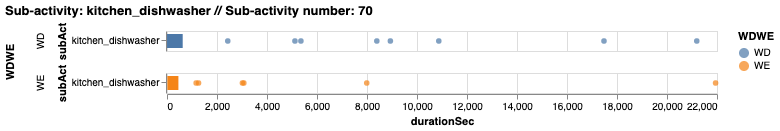

In [97]:
boxPlots[11]

This makes no sense - leave for now and check literature

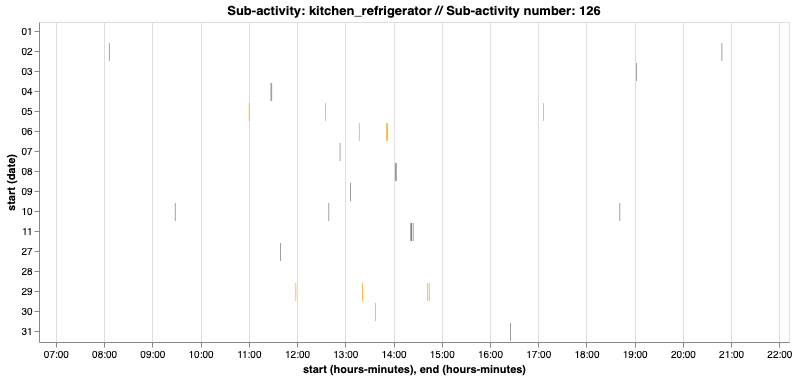

In [66]:
charts[12]

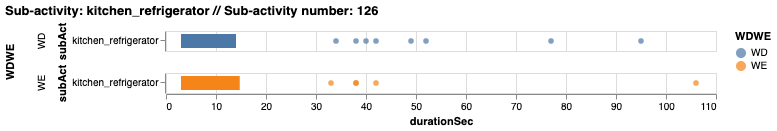

In [100]:
boxPlots[12]

Perfect!

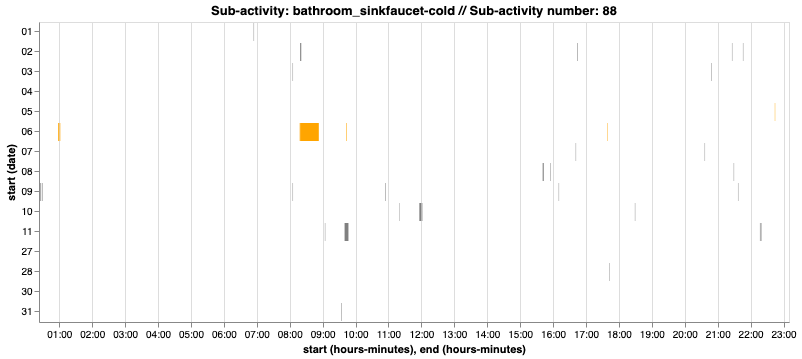

In [67]:
charts[13]

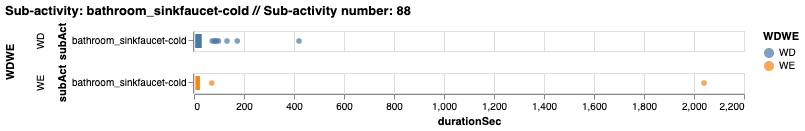

In [101]:
boxPlots[13]

In [ ]:
Perfect!

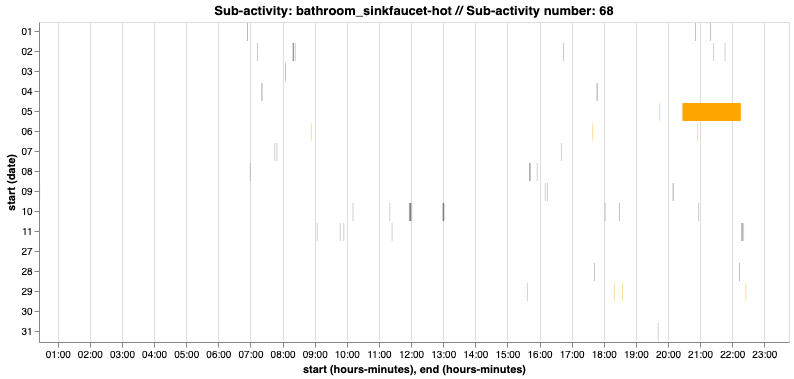

In [68]:
charts[14]

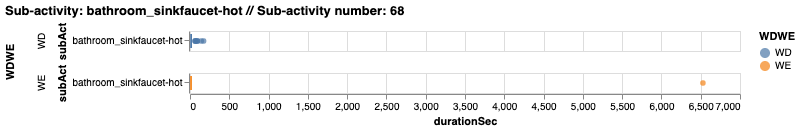

In [102]:
boxPlots[14]

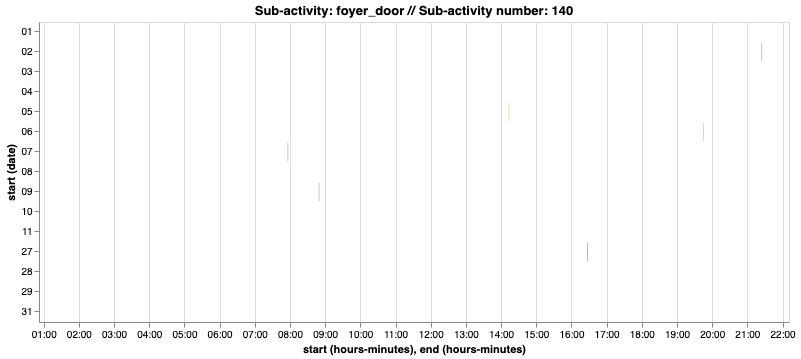

In [69]:
charts[15]

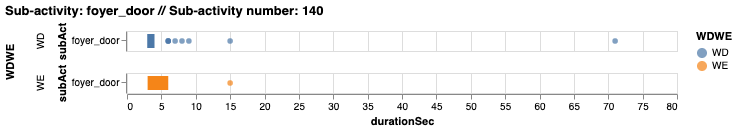

In [104]:
boxPlots[15]

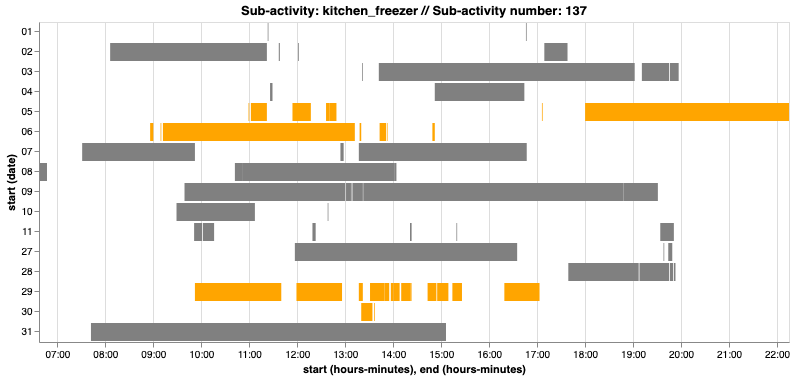

In [70]:
charts[16]

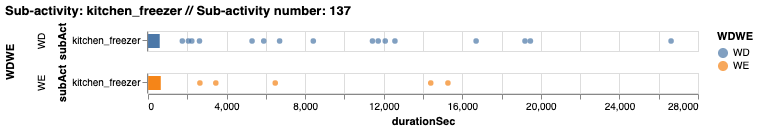

In [105]:
boxPlots[16]

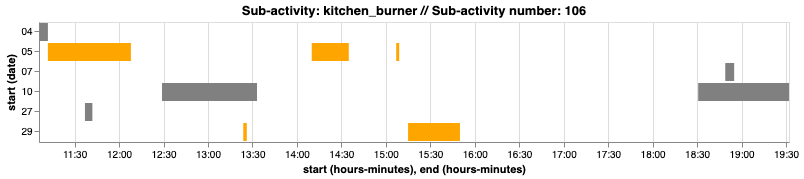

In [71]:
charts[17]

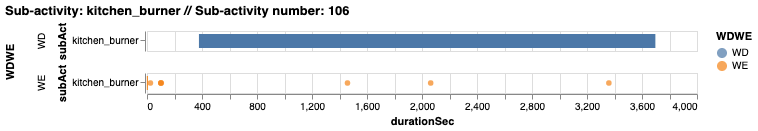

In [106]:
boxPlots[17]

Perfect

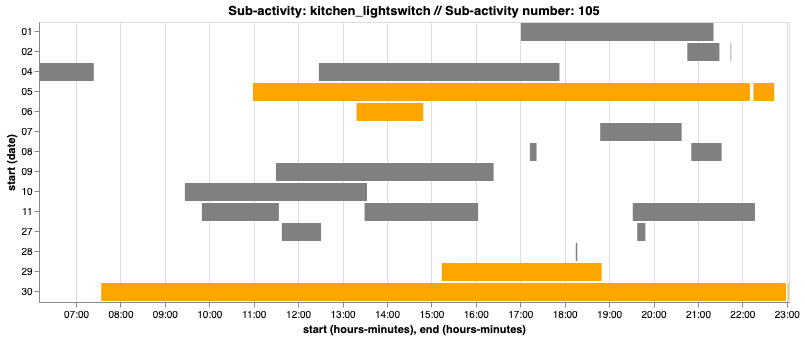

In [72]:
charts[18]

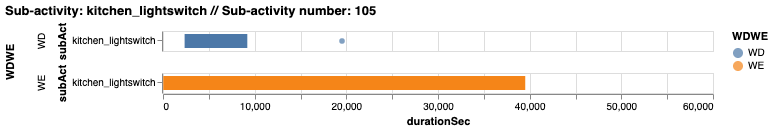

In [107]:
boxPlots[18]

Leave as is

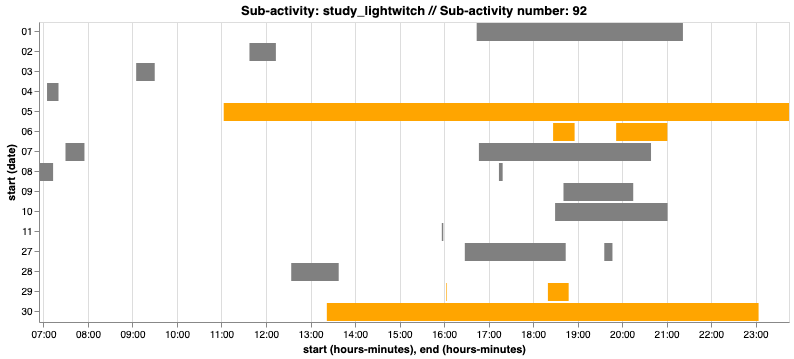

In [73]:
charts[19]

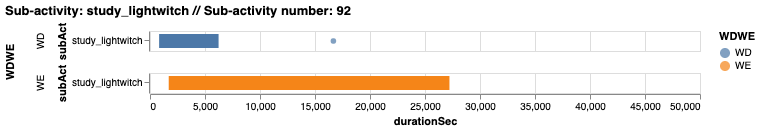

In [108]:
boxPlots[19]

Leave as is

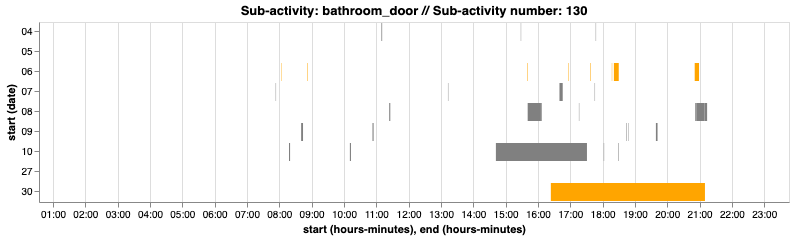

In [74]:
charts[20]

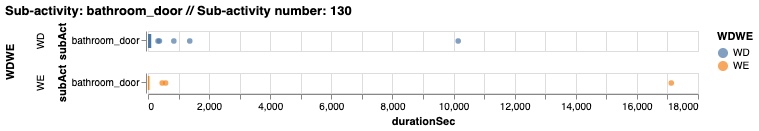

In [109]:
boxPlots[20]

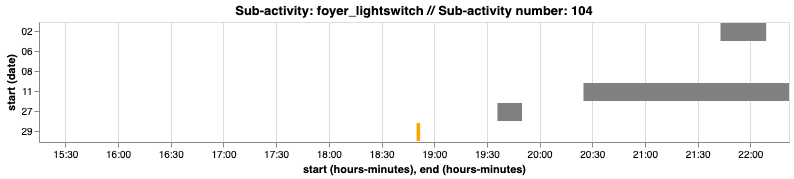

In [75]:
charts[21]

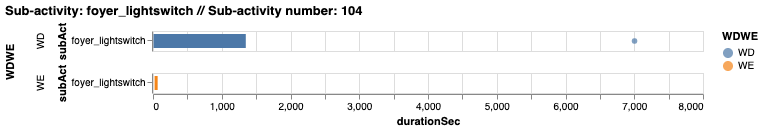

In [110]:
boxPlots[21]

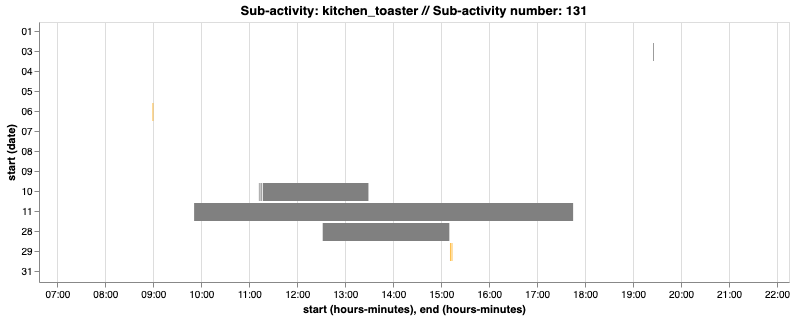

In [76]:
charts[22]

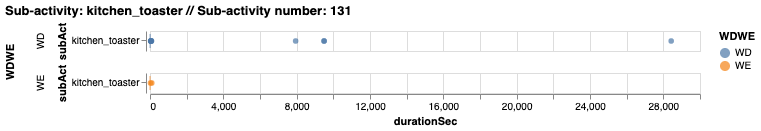

In [111]:
boxPlots[22]

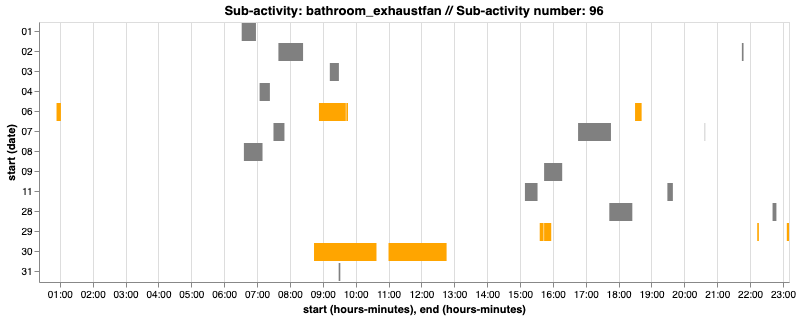

In [77]:
charts[23]

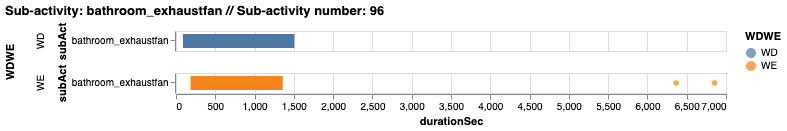

In [112]:
boxPlots[23]

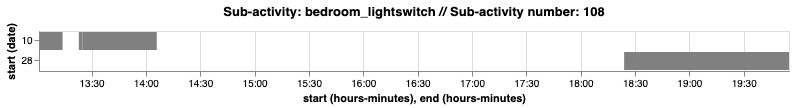

In [78]:
charts[24]

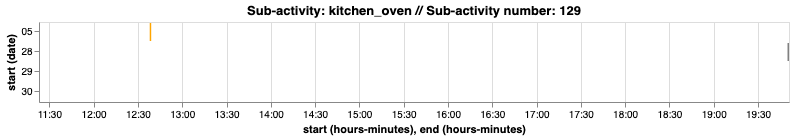

In [79]:
charts[25]

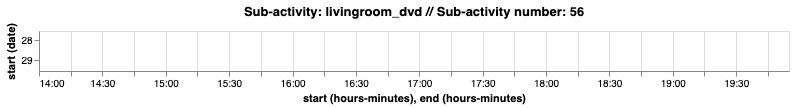

In [80]:
charts[26]

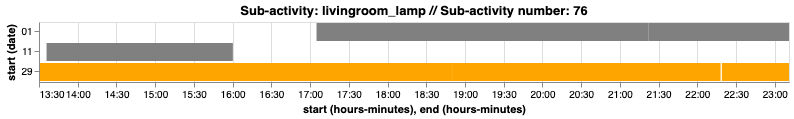

In [81]:
charts[27]

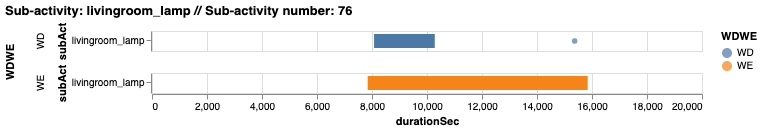

In [113]:
boxPlots[27]

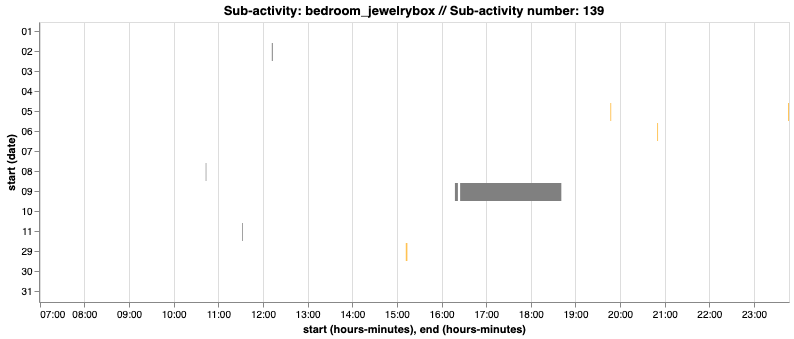

In [82]:
charts[28]

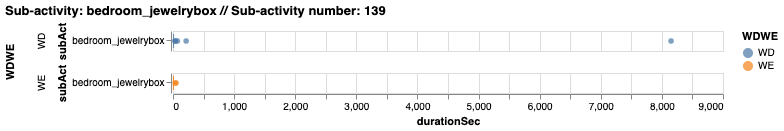

In [114]:
boxPlots[28]

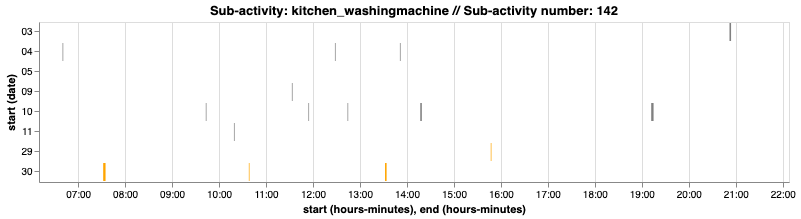

In [83]:
charts[29]

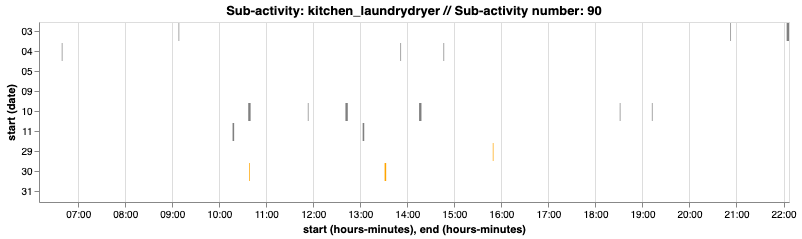

In [84]:
charts[30]

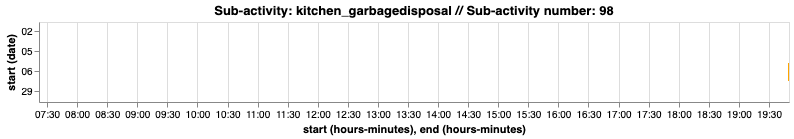

In [85]:
charts[31]

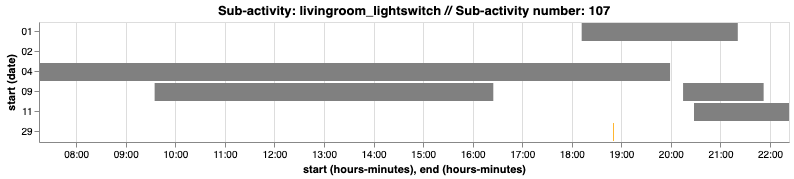

In [86]:
charts[32]

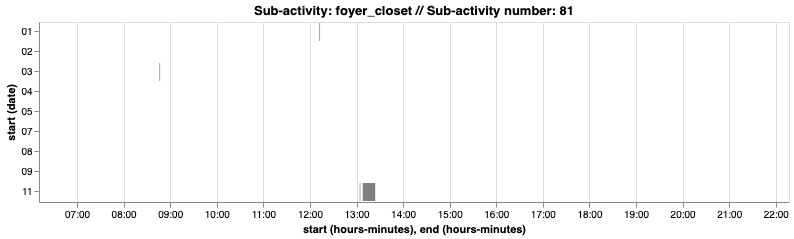

In [87]:
charts[33]

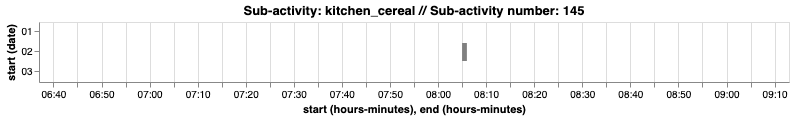

In [88]:
charts[34]

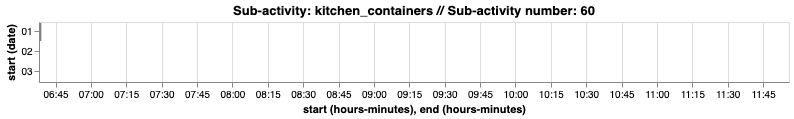

In [89]:
charts[35]

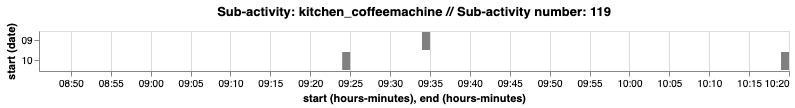

In [90]:
charts[36]

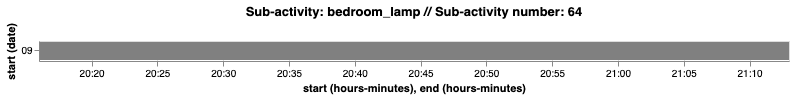

In [91]:
charts[37]

In [115]:
ds.head(n=5)

subActNum                    subAct               start  \
0         67          bathroom_cabinet 2003-03-27 06:43:40   
1        100      bathroom_toiletflush 2003-03-27 06:44:06   
2        101      bathroom_lightswitch 2003-03-27 06:44:20   
3         57  bathroom_medicinecabinet 2003-03-27 06:44:35   
4         57  bathroom_medicinecabinet 2003-03-27 06:44:36   

                  end dayNumeric  DAY WDWE  HOUR  durationSec  
0 2003-03-27 06:43:43          3  Thu   WD     6          3.0  
1 2003-03-27 07:12:41          3  Thu   WD     6       1715.0  
2 2003-03-27 07:46:34          3  Thu   WD     6       3734.0  
3 2003-03-27 06:44:48          3  Thu   WD     6         13.0  
4 2003-03-27 06:44:48          3  Thu   WD     6         12.0

In [117]:
#dropValues = ['bedroom_jewelrybox', 'foyer_closet', 'kitchen_cereal', 
#              'kitchen_containers', 'bedroom_lamp']
#https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/

In [225]:
# Should this be done earlier?
ds = ds[ds.subAct != 'bedroom_jewelrybox']
ds = ds[ds.subAct != 'foyer_closet']
ds = ds[ds.subAct != 'kitchen_cereal']
ds = ds[ds.subAct != 'kitchen_containers']
ds = ds[ds.subAct != 'bedroom_lamp']

### Overwrite ALL
* subAct ['bathroom_toiletflush']

In [226]:
ds.head(n=5)

subActNum                    subAct               start  \
0         67          bathroom_cabinet 2003-03-27 06:43:40   
1        100      bathroom_toiletflush 2003-03-27 06:44:06   
2        101      bathroom_lightswitch 2003-03-27 06:44:20   
3         57  bathroom_medicinecabinet 2003-03-27 06:44:35   
4         57  bathroom_medicinecabinet 2003-03-27 06:44:36   

                  end dayNumeric  DAY WDWE  HOUR  durationSec  
0 2003-03-27 06:43:43          3  Thu   WD     6            3  
1 2003-03-27 07:12:41          3  Thu   WD     6         1715  
2 2003-03-27 07:46:34          3  Thu   WD     6         3734  
3 2003-03-27 06:44:48          3  Thu   WD     6           13  
4 2003-03-27 06:44:48          3  Thu   WD     6           12

In [227]:
ds['durationSec'] = np.where(ds['subActNum'] == 100, 1, ds['durationSec'])

In [228]:
from datetime import datetime, timedelta
ds['end'] = np.where(ds['subActNum'] == 100, 
                     ds['start'] + timedelta(seconds=1), ds['end'])

In [231]:
dsCheck = ds[ds.subActNum == 100]
dsCheck.head()

subActNum                subAct               start                 end  \
1         100  bathroom_toiletflush 2003-03-27 06:44:06 2003-03-27 06:44:07   
17        100  bathroom_toiletflush 2003-03-27 07:34:47 2003-03-27 07:34:48   
77        100  bathroom_toiletflush 2003-03-27 17:43:13 2003-03-27 17:43:14   
98        100  bathroom_toiletflush 2003-03-28 12:31:01 2003-03-28 12:31:02   
99        100  bathroom_toiletflush 2003-03-28 12:31:01 2003-03-28 12:31:02   

   dayNumeric  DAY WDWE  HOUR  durationSec  
1           3  Thu   WD     6            1  
17          3  Thu   WD     7            1  
77          3  Thu   WD    17            1  
98          4  Fri   WD    12            1  
99          4  Fri   WD    12            1

In [ ]:
#Fill OUTLIER with Mean (excluding outliers)

In [232]:
subActNames = ['bathroom_cabinet', 'bathroom_medicinecabinet', 'study_drawer', 
                'bedroom_drawer', 'kitchen_cabinet', 'kitchen_microwave', 
                'kitchen_door', 'bathroom_showerfaucet', 'kitchen_drawer', 
                'bathroom_sinkfaucet-hot', 'kitchen_freezer', 'bathroom_door',
                'kitchen_toaster']

In [145]:
ds.head()

subActNum                    subAct               start  \
0         67          bathroom_cabinet 2003-03-27 06:43:40   
1        100      bathroom_toiletflush 2003-03-27 06:44:06   
2        101      bathroom_lightswitch 2003-03-27 06:44:20   
3         57  bathroom_medicinecabinet 2003-03-27 06:44:35   
4         57  bathroom_medicinecabinet 2003-03-27 06:44:36   

                  end dayNumeric  DAY WDWE  HOUR  durationSec  
0 2003-03-27 06:43:43          3  Thu   WD     6          3.0  
1 2003-03-27 06:44:07          3  Thu   WD     6          1.0  
2 2003-03-27 07:46:34          3  Thu   WD     6       3734.0  
3 2003-03-27 06:44:48          3  Thu   WD     6         13.0  
4 2003-03-27 06:44:48          3  Thu   WD     6         12.0

In [243]:
# https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32

import numpy as np
import pandas as pd

def detect_outlier(data_1):
    outliers=[]
    threshold = 1
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score = (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [244]:
subActRows = []

for subActName in subActNames:
    dsNew = ds[ds.subAct == subActName]
    dsNew = dsNew[dsNew.WDWE == 'WD']
    count = dsNew.durationSec.count()
    median = dsNew.durationSec.median() 
    outliers = detect_outlier(dsNew['durationSec'])
    
    column = {'SubAct': subActName,'Count': count,'Median': median, 'Outliers': outliers}
    subActRows.append(column)

weekDayMedianValues = pd.DataFrame(subActRows, index=None, 
                            columns=['SubAct', 'Count', 'Median', 'Outliers'])

In [245]:
weekDayMedianValues

SubAct  Count  Median  \
0           bathroom_cabinet     78     3.0   
1   bathroom_medicinecabinet    145    74.0   
2               study_drawer     39     4.0   
3             bedroom_drawer     73     9.0   
4            kitchen_cabinet    255     6.0   
5          kitchen_microwave     40     6.0   
6               kitchen_door     42    18.0   
7      bathroom_showerfaucet     48   176.0   
8             kitchen_drawer     92     3.5   
9    bathroom_sinkfaucet-hot    126    10.0   
10           kitchen_freezer     81    28.0   
11             bathroom_door     51    19.0   
12           kitchen_toaster     47     5.0   

                                             Outliers  
0                                             [19846]  
1   [16960, 22446, 26569, 35314, 15572, 30019, 300...  
2                           [9924, 5547, 11508, 9401]  
3                                       [16787, 9291]  
4                                             [37569]  
5                                             [22414]  
6                                         [1815, 588]  
7          [40029, 15741, 12569, 33495, 12498, 26214]  
8                 [41, 95, 48, 120, 54, 41, 116, 116]  
9   [97, 67, 68, 53, 64, 92, 83, 51, 46, 173, 144,...  
10  [16704, 26629, 11721, 19192, 8415, 12571, 1142...  
11                                            [10152]  
12                          [9496, 9496, 7943, 28429]

In [252]:
s = weekDayMedianValues.apply(lambda x: pd.Series(x['Outliers']), 
                              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'durationValues'
weekDayValues = weekDayMedianValues.drop('Outliers', axis=1).join(s)

In [270]:
weekDayValues['WDWE'] = 'WD'
weekDayValues['durationValues'] = weekDayValues.durationValues.astype(int)
weekDayValues['Median'] = weekDayValues.Median.astype(int)

In [271]:
weekDayValues

SubAct  Count  Median  durationValues WDWE
0           bathroom_cabinet     78       3           19846   WD
1   bathroom_medicinecabinet    145      74           16960   WD
1   bathroom_medicinecabinet    145      74           22446   WD
1   bathroom_medicinecabinet    145      74           26569   WD
1   bathroom_medicinecabinet    145      74           35314   WD
..                       ...    ...     ...             ...  ...
11             bathroom_door     51      19           10152   WD
12           kitchen_toaster     47       5            9496   WD
12           kitchen_toaster     47       5            9496   WD
12           kitchen_toaster     47       5            7943   WD
12           kitchen_toaster     47       5           28429   WD

[68 rows x 5 columns]

In [256]:
subActRows = []
for subActName in subActNames:
    dsNew = ds[ds.subAct == subActName]
    dsNew = dsNew[dsNew.WDWE == 'WE']
    count = dsNew.durationSec.count()
    median = dsNew.durationSec.median() 
    outliers = detect_outlier(dsNew['durationSec'])
    
    column = {'SubAct': subActName,'Count': count,'Median': median, 'Outliers': outliers}
    subActRows.append(column)

weekendMedianValues = pd.DataFrame(subActRows, index=None, 
                            columns=['SubAct', 'Count', 'Median', 'Outliers'])

In [257]:
s = weekendMedianValues.apply(lambda x: pd.Series(x['Outliers']), 
                              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'durationValues'
weekendValues = weekendMedianValues.drop('Outliers', axis=1).join(s)

In [272]:
weekendValues['WDWE'] = 'WE'
weekendValues['durationValues'] = weekendValues.durationValues.astype(int)
weekendValues['Median'] = weekendValues.Median.astype(int)

In [273]:
weekendValues

SubAct  Count  Median  durationValues WDWE
0           bathroom_cabinet     26       2           25775   WE
1   bathroom_medicinecabinet     49     104           14473   WE
1   bathroom_medicinecabinet     49     104           10785   WE
1   bathroom_medicinecabinet     49     104           19324   WE
1   bathroom_medicinecabinet     49     104           23600   WE
1   bathroom_medicinecabinet     49     104           30768   WE
1   bathroom_medicinecabinet     49     104           12307   WE
1   bathroom_medicinecabinet     49     104           10813   WE
2               study_drawer      6      15           32613   WE
3             bedroom_drawer     26       7               1   WE
3             bedroom_drawer     26       7              25   WE
3             bedroom_drawer     26       7               1   WE
3             bedroom_drawer     26       7              31   WE
3             bedroom_drawer     26       7              26   WE
3             bedroom_drawer     26       7               1   WE
3             bedroom_drawer     26       7              21   WE
4            kitchen_cabinet    151       6             132   WE
4            kitchen_cabinet    151       6             122   WE
4            kitchen_cabinet    151       6             288   WE
4            kitchen_cabinet    151       6             245   WE
4            kitchen_cabinet    151       6             179   WE
4            kitchen_cabinet    151       6             173   WE
4            kitchen_cabinet    151       6             201   WE
4            kitchen_cabinet    151       6             198   WE
4            kitchen_cabinet    151       6              85   WE
4            kitchen_cabinet    151       6             214   WE
4            kitchen_cabinet    151       6             174   WE
4            kitchen_cabinet    151       6             336   WE
5          kitchen_microwave     21       3              48   WE
5          kitchen_microwave     21       3              24   WE
5          kitchen_microwave     21       3              26   WE
6               kitchen_door     92       3             486   WE
6               kitchen_door     92       3             159   WE
6               kitchen_door     92       3             167   WE
7      bathroom_showerfaucet     40       1             222   WE
7      bathroom_showerfaucet     40       1             124   WE
7      bathroom_showerfaucet     40       1             177   WE
8             kitchen_drawer    116       3           24895   WE
9    bathroom_sinkfaucet-hot     43       9            6528   WE
10           kitchen_freezer     49      51            6478   WE
10           kitchen_freezer     49      51           15269   WE
10           kitchen_freezer     49      51           14394   WE
11             bathroom_door     22      11           17125   WE
12           kitchen_toaster     24       2              96   WE

In [283]:
#for row in ds:

#ds['durationSec'] = np.where(ds.subAct == weekendValues.subAct) &&
#                       (ds['WDWE'] == weekendValues['WDWE']) & 
#                       (ds['durationSec'] == weekendValues['durationValues']),
#                      ds['durationSec'] == weekendValues['Median']
# multiple nested where
ds['durationSec'] = np.where(ds.subAct == weekendValues.SubAct,
                         (np.where(ds['WDWE'] == weekendValues['WDWE'],
                                   np.where(ds['durationSec'] == weekendValues['durationValues'], 
                                            weekendValues['Median']))))
                       
                       
#df['X'] = np.where(df['Y']>=50, 'yes', 'no')

ValueError: Can only compare identically-labeled Series objects

In [277]:
ds.head(n=5)

subActNum                    subAct               start  \
0         67          bathroom_cabinet 2003-03-27 06:43:40   
1        100      bathroom_toiletflush 2003-03-27 06:44:06   
2        101      bathroom_lightswitch 2003-03-27 06:44:20   
3         57  bathroom_medicinecabinet 2003-03-27 06:44:35   
4         57  bathroom_medicinecabinet 2003-03-27 06:44:36   

                  end dayNumeric  DAY WDWE  HOUR  durationSec  
0 2003-03-27 06:43:43          3  Thu   WD     6            3  
1 2003-03-27 06:44:07          3  Thu   WD     6            1  
2 2003-03-27 07:46:34          3  Thu   WD     6         3734  
3 2003-03-27 06:44:48          3  Thu   WD     6           13  
4 2003-03-27 06:44:48          3  Thu   WD     6           12

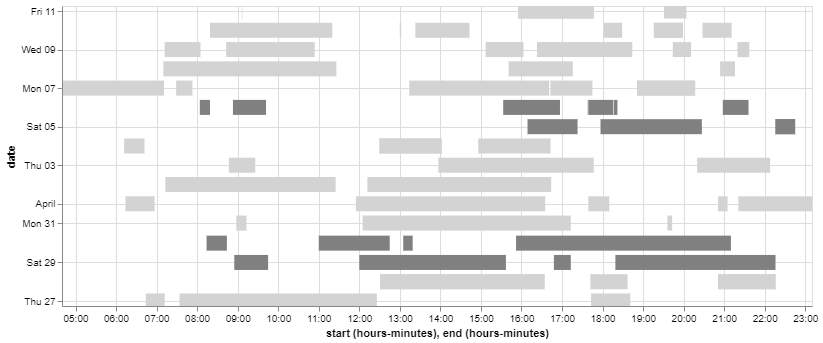

In [291]:
# selection = alt.selection_multi(fields=['origin'])
# color = alt.condition(selection,
#                       alt.Color('origin:N', legend=None),
#                       alt.value('lightgray'))



dsCheck = ds[ds['subActNum']==100]

color = alt.condition(alt.datum.day>4,
                      alt.value('grey'),
                      alt.value('lightgrey'))

# color = alt.condition(ds[ds.WDWE=="WE"],
#                       alt.value('blue'),
#                       alt.value('red'))

df = pd.DataFrame({ 
    'start': dsCheck.start,
    'date': dsCheck['start'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day)),
    'end': dsCheck.end,
    'day': dsCheck.DAY})

alt.Chart(df.reset_index()).mark_bar(size=15).encode(
    y='date:T',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index',
    color=color
).properties(width=750).interactive()

In [ ]:
ds[ds.WDWE=="WE"]

In [90]:
#https://stackoverflow.com/questions/50164001/multiple-column-row-facet-wrap-in-altair?rq=1

---

In [13]:
ds[ds.subActNum==67].subAct.head(1).item()

//anaconda3/envs/IoT_ResearchProject/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


'bathroom_cabinet'